In [33]:
from src.pispec import PiSpec
from src.trace_utils import TraceParams
import matplotlib.pyplot as plt

# initialize the interface0 v
pispec = PiSpec()
print(pispec.tracecontroller.device)
# alternate the datapoints between two detectors? 
# Thats a tracecontroller things

pispec.power("off")
pispec.set_actinic(0)


/dev/ttyACM3


'a0;'

<AxesSubplot:title={'center':'Light intensity vs 0-255 digipot value'}, xlabel='act_val', ylabel='uE'>

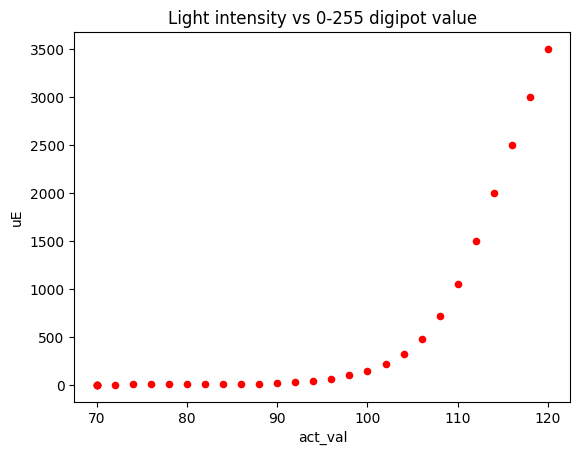

In [11]:
import pandas as pd
import numpy as np 

df = pd.read_csv("cal_data.csv", names=["act_val", "uE"])

df["log_uE"] = df["uE"].transform(np.log)
df.plot(kind='scatter',
x = 'act_val',
y= 'uE',
color='red',
title="Light intensity vs 0-255 digipot value")

In [25]:
%matplotlib inline

from sklearn.metrics import r2_score

# fit the data
x = df.act_val.astype(int)
y = df.uE.astype(int)

model = np.polyfit(x, y, 1)
pred = np.poly1d(model)

plt.scatter(x, y)


ModuleNotFoundError: No module named 'sklearn'

In [18]:
cal_data = []

for i in range(50, 70):
    act_int = i * 2
    pispec.set_actinic(act_int)
    pispec.power("on")
    ue = input("Enter measured light intensity: ")
    pispec.power("off")
    pispec.set_actinic(0)
    cal_data.append((act_int, ue))
    print(f'{act_int}, {ue}\n')

3500


100, 145

102, 220

104, 325

106, 481

108, 720

110, 1050

112, 1500

114, 2000

116, 2500

118, 3000

120, 3500



In [23]:
def pulse_series(n: int, pulse_ms: int):        
    for x in range(0, n):
        pispec.wait(pulse_ms / 1000)
        pispec.power("on")
        pispec.wait(pulse_ms / 1000)
        pispec.power("off")

begin_int = 0
end_int = 255
num_pulses = 1
pulse_ms = 500

while True:

    for intensity in range(begin_int, end_int):
        pispec.set_actinic(intensity)
        pulse_series(num_pulses, pulse_ms)
        print(intensity)

    if begin_int == 0:
        begin_int = 255
        end_int = 0
    else:
        begin_int = 0
        end_int = 255

pispec.set_actinic(0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137


KeyboardInterrupt: 

In [ ]:
pispec.power("off")


In [ ]:
for x in (0, 255, 0):
    print(pispec.set_actinic(x))
    pispec.wait(1)


In [ ]:
# # pispec.reconnect()
# power("off")
resp = pispec.power("on")
print(resp)

resp = pispec.power("off")
print(resp)

In [ ]:
for i in range(0, 255):
    print(pispec.set_actinic(i))
    pispec.wait(0.25)


In [ ]:
pispec.set_actinic(0)

In [ ]:


def act_pulse(pulse_length:float, intensity: int):
    resp1 = pispec.tracecontroller.set_parameters(intensity)
    pispec.wait(pulse_length)
    resp2 = pispec.tracecontroller.set_parameters(intensity)
    # print(f"{resp1}, {resp2}")

# for i in range(0, 255):
#     act_pulse()

int_list = [x*10 for x in range(0, 25)] 
# int_list = [255, 100, 50, 100, 255]

for i in range(0, 255):
    int_list.reverse()

    for intensity in int_list:
        # print(intensity)
        pispec.set_actinic(intensity)
        pispec.wait(1)
        
    

        


'j1;'

r0;v1;n2000;z1;i500;p60;e0;w0;x0;y140;
counter=2001,numAq=5,power_state=0, sat_pulse_begin=500, sat_pulse_end=600, pulse_length=60, pulse_interval=500, meas_led_vis=2, meas_led_ir=0, num_points=2000, pulse_mode=1, act_int_phase=[0|0|140], trigger_delay=0;

LED: 1
Experiment 'testBadger' concluded, trace data is ready for processing.


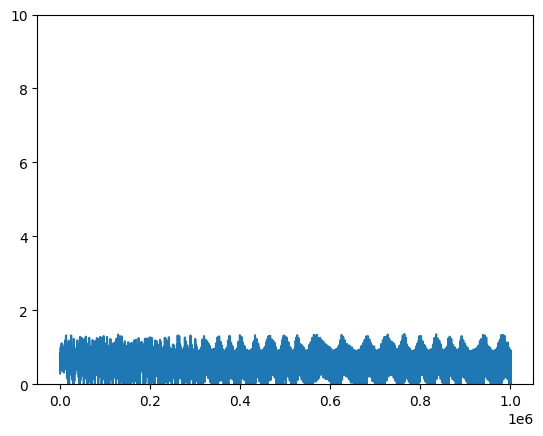

In [55]:
pispec = PiSpec()

#experiment variables
exp_name = "testBadger"
trace_params = [TraceParams(num_points=2000,
    pulse_interval = 500,
    meas_led_ir = 0,
    meas_led_vis = 1,
    pulse_length = 60,
    sat_pulse_begin = 800,
    sat_pulse_end = 1200,
    pulse_mode = 1,
    trigger_delay = 0,
    trace_note = "debug",
    act_intensity = [0, 0, 140]
) for x in range(0, 1)]

# begin experiment
pispec.init_experiment(exp_name=exp_name)
pispec.tracecontroller.set_parameters("j1")

for param in trace_params:

    # setup the trace paramaters
    print(param.param_string)
    print(pispec.setup_trace(param))

    # see if the trace parameters are in place
    # print(f"The current trace parameters are: {pispec.tracecontroller.get_parameters()}")

    # run trace
    print(f"LED: {param.meas_led_vis}")
    status = pispec.run_trace(timeout_s=1000)
    # print(f"pispec.run_trace completed with status: {status}")

    # wait between traces
    pispec.wait(2)

print(f"Experiment '{exp_name}' concluded, trace data is ready for processing.")

# dfs = pispec.get_data()
dfs = pispec.get_data()
df = dfs[0]

# row means of all the data points
df["val"] = df[['aq_0', 'aq_1', 'aq_2', 'aq_3', 'aq_4']].mean(numeric_only = True, axis=1)

df["V"] = df["val"] / 6535

plt.plot(df['time_us'], df['V'])
plt.ylim(0, 10)
plt.show()


In [36]:
# dfs = pispec.get_data()
dfs = pispec.get_data()
df = dfs[0]

# row means of all the data points
df["val"] = df[['aq_0', 'aq_1', 'aq_2', 'aq_3', 'aq_4']].mean(numeric_only = True, axis=1)

df["V"] = df["val"] / 6535

plt.plot(df['time_us'], df['V'])
plt.ylim(0, 5)
plt.show()

   trace_num  rep   trace_begun     trace_end  \
0          0    0  1.664238e+09  1.664238e+09   
1          0    0  1.664238e+09  1.664238e+09   
2          0    0  1.664238e+09  1.664238e+09   
3          0    0  1.664238e+09  1.664238e+09   
4          0    0  1.664238e+09  1.664238e+09   

                             param_string note  pt_num  time_us    aq_0  \
0  r0;v1;n2000;z1;i500;p60;e0;w0;x190;y0;          0.0      5.0  1024.0   
1  r0;v1;n2000;z1;i500;p60;e0;w0;x190;y0;          1.0    506.0  1024.0   
2  r0;v1;n2000;z1;i500;p60;e0;w0;x190;y0;          2.0   1007.0   768.0   
3  r0;v1;n2000;z1;i500;p60;e0;w0;x190;y0;          3.0   1508.0   768.0   
4  r0;v1;n2000;z1;i500;p60;e0;w0;x190;y0;          4.0   2009.0   768.0   

     aq_1    aq_2    aq_3    aq_4  
0  1280.0  1536.0  1536.0  1536.0  
1  1280.0  1536.0  1536.0  1792.0  
2  1280.0  1280.0  1792.0  1792.0  
3  1280.0  1792.0  1792.0  1792.0  
4  1536.0  1792.0  1792.0  1792.0  


   trace_num  rep   trace_begun     trace_end  \
0          0    0  1.664236e+09  1.664236e+09   
1          0    0  1.664236e+09  1.664236e+09   
2          0    0  1.664236e+09  1.664236e+09   
3          0    0  1.664236e+09  1.664236e+09   
4          0    0  1.664236e+09  1.664236e+09   

                             param_string note  pt_num  time_us  aq_0  aq_1  \
0  r0;v1;n1000;z1;i1000;p40;e0;w0;x90;y0;          0.0      4.0   0.0   0.0   
1  r0;v1;n1000;z1;i1000;p40;e0;w0;x90;y0;          1.0   1005.0   0.0   0.0   
2  r0;v1;n1000;z1;i1000;p40;e0;w0;x90;y0;          2.0   2006.0   0.0   0.0   
3  r0;v1;n1000;z1;i1000;p40;e0;w0;x90;y0;          3.0   3007.0   0.0   0.0   
4  r0;v1;n1000;z1;i1000;p40;e0;w0;x90;y0;          4.0   4008.0   0.0   0.0   

   aq_2  aq_3  aq_4  
0   0.0   0.0   0.0  
1   0.0   0.0   0.0  
2   0.0   0.0   0.0  
3   0.0   0.0   0.0  
4   0.0   0.0   0.0  


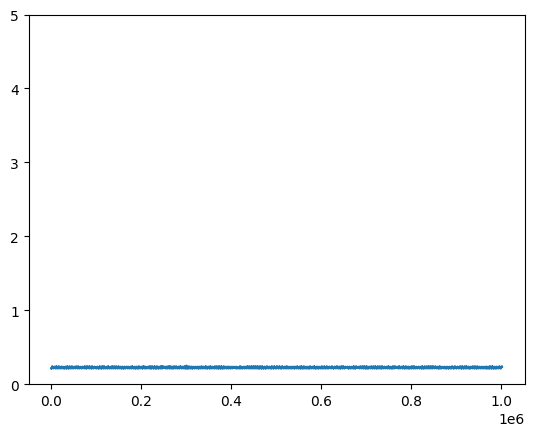

In [39]:
# row means of all the data points
df["val"] = df[['aq_0', 'aq_1', 'aq_2', 'aq_3', 'aq_4']].mean(numeric_only = True, axis=1)

df["V"] = df["val"] / 6535

plt.plot(df['time_us'], df['V'])
plt.ylim(0, 5)
plt.show()

In [ ]:
plt.plot(df['time_us'], df['V'])
plt.ylim(0, 10)
plt.show()

In [ ]:
(x='time_us', y='val')
plt.show()

# plt.plot(df['time_us'], df['aq_0'])
# plt.show()

In [ ]:

# pispec.tracecontroller.modify_actinic(intensity=500)
# time.sleep(5)
